## Deep-Tron(che)

In [1]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [2]:
import keras
keras.__version__

'2.4.3'

In [11]:
import sys
from PIL import Image

```bash
a=0
for i in *.jpg; do
  new=$(printf "%04d.jpg" "$a") #04 pad to length of 4
  mv -- "$i" "$new"
  let a=a+1
done

mogrify -brightness-contrast 19x3 -type grayscale -resize 100x100! *.jpg
```

```python
from PIL import Image
import numpy as np
im = Image.open("")
np.array(im)
```

In [18]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise
from keras import backend as K
K.set_image_data_format('channels_last')

In [23]:
model = Sequential()

model.add(GaussianNoise(stddev=1, input_shape=(100, 100, 1)))

# ConvNet
model.add(Convolution2D(16, (3, 3), input_shape=(100, 100, 1), padding="same"))
model.add(Convolution2D(16, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# FC
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(16))
model.add(Activation('sigmoid'))

model.add(Dense(2))#4))
model.add(Activation('softmax'))

In [24]:
model.compile(loss='binary_crossentropy',#categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_5 (GaussianNo (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 100, 100, 16)      2320      
_________________________________________________________________
activation_15 (Activation)   (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 64)        9280      
_________________________________________________________________
activation_16 (Activation)   (None, 48, 48, 64)       

In [25]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train/',  # this is the target directory
        target_size=(100, 100),  # all images will be resized to 100x100
        color_mode="grayscale",
        batch_size=32,
        class_mode='categorical')

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation/',
        target_size=(100, 100),
        color_mode="grayscale",
        batch_size=32,
        class_mode='categorical')

Found 5752 images belonging to 2 classes.
Found 1462 images belonging to 2 classes.


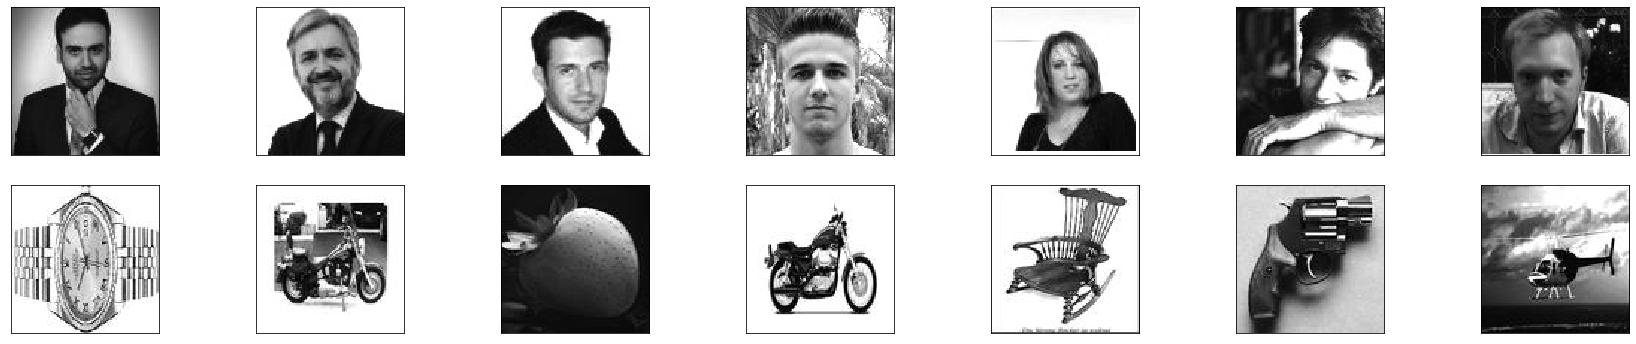

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import glob
human = glob.glob("data/train/human/*.jpg")
objet = glob.glob("data/train/object/*.jpg")
from PIL import Image
import numpy as np
n=7
plt.figure(figsize=(30, 6))
for i in range(n):
    im1 = Image.open(human[i])
    x1 = np.array(im1)/255.
    x1 = x1.reshape(-1,1,100,100)
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x1.reshape(100, 100))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    im2 = Image.open(objet[i])
    x2 = np.array(im2)/255.
    x2 = x2.reshape(-1,1,100,100)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x2.reshape(100, 100))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
model.fit(train_generator,
          steps_per_epoch=1024,
          epochs=1, # nb_epoch=50 # 4 CPUs: ~80s / epoch - Amazon GPU GRID K520: 2s / epoch!
          validation_data=validation_generator,
          validation_steps=512)

1024/1024 [==============================] - 317s 310ms/step - loss: 0.4220 - accuracy: 0.7930 - val_loss: 0.5837 - val_accuracy: 0.6883


In [29]:
print(sorted(train_generator.class_indices.items(), key=lambda x: x[1]))
mapping = {v: k for k, v in train_generator.class_indices.items()}

[('human', 0), ('object', 1)]


In [31]:
model.save_weights('model_1epoch.h5')
model.load_weights('model_1epoch.h5')

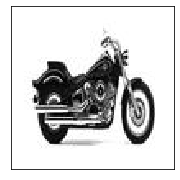

human 4.0 %
object 96.0 %


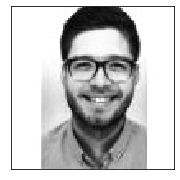

human 82.0 %
object 18.0 %


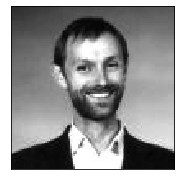

human 84.0 %
object 16.0 %


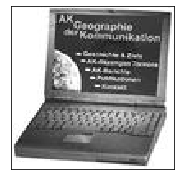

human 10.0 %
object 90.0 %


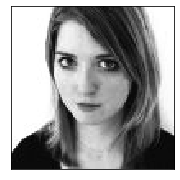

human 92.0 %
object 8.0 %


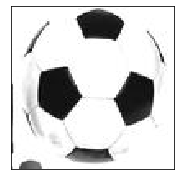

human 7.0 %
object 93.0 %


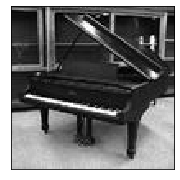

human 6.0 %
object 94.0 %


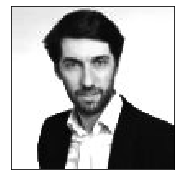

human 98.0 %
object 2.0 %


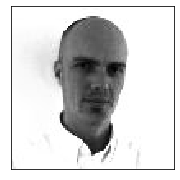

human 10.0 %
object 90.0 %


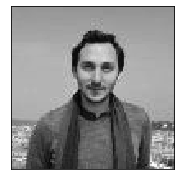

human 49.0 %
object 51.0 %


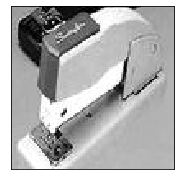

human 13.0 %
object 87.0 %


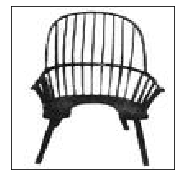

human 4.0 %
object 96.0 %


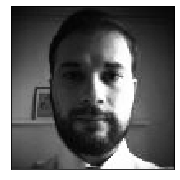

human 67.0 %
object 33.0 %


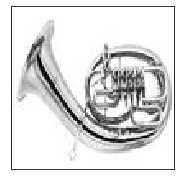

human 7.0 %
object 93.0 %


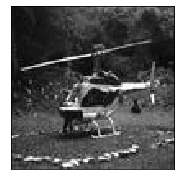

human 20.0 %
object 80.0 %


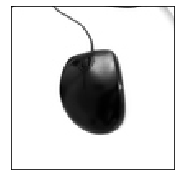

human 9.0 %
object 91.0 %


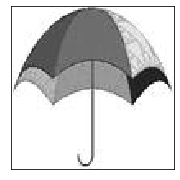

human 6.0 %
object 94.0 %


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import glob
files = glob.glob("data/new/*.jpg")

from PIL import Image
import numpy as np
for file_ in files:
    plt.figure(figsize=(15, 3))
    im = Image.open(file_)
    x = np.array(im)/255.
    x = x.reshape(-1, 100,100, 1)
    ax = plt.subplot(1, 1, 1)
    plt.imshow(x.reshape(100, 100))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #print file_
    plt.show()
    pred = model.predict_proba(x)
    for key in range(2):
        print(mapping[key], round(pred[0][key]*100.), "%")
    #time.sleep(1)